# Bike Sharing Dataset Exploratory Analysis

+ Based on Bike Sharing dataset from [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset)
+ This notebook is based upon the hourly data file, i.e. hour.csv

---
Reference:
Fanaee-T, Hadi, and Gama, Joao, 'Event labeling combining ensemble detectors and background knowledge', Progress in Artificial Intelligence (2013): pp. 1-15, Springer Berlin Heidelberg,

In [14]:
# data manipulation 
import numpy as np
import pandas as pd

# plotting
import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib inline

# setting params
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (30, 10),
          'axes.labelsize': 'x-large',
          'axes.titlesize':'x-large',
          'xtick.labelsize':'x-large',
          'ytick.labelsize':'x-large'}

sn.set_style('whitegrid')
sn.set_context('talk')

plt.rcParams.update(params)
pd.options.display.max_colwidth = 600

# pandas display data frames as tables
from IPython.display import display, HTML

## Load Dataset

In [15]:
hour_df = pd.read_csv('hour.csv')
print("Shape of dataset::{}".format(hour_df.shape))

Shape of dataset::(17379, 17)


In [16]:
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


## Data Types and Summary Stats

In [17]:
# data types of attributes
hour_df.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
hr              int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

The dataset has:
+ 17 attributes in total and 17k+ records
+ Except dtedat, rest all are numeric(int or float)
+ As stated on the UCI dataset page, the following attributes have been normalized (same is confirmed above):
    + temp, atemp
    + humidity
    + windspeed
+ Dataset has many categorical variables like season, yr, holiday, weathersit and so on. These will need to handled with care

## Standardize Attribute Names

In [18]:
hour_df.rename(columns={'instant':'rec_id',
                      'dteday':'datetime',
                      'holiday':'is_holiday',
                      'workingday':'is_workingday',
                      'weathersit':'weather_condition',
                      'hum':'humidity',
                      'mnth':'month',
                      'cnt':'total_count',
                      'hr':'hour',
                      'yr':'year'},inplace=True)

In [19]:
#Renamed features
hour_df.dtypes

rec_id                 int64
datetime              object
season                 int64
year                   int64
month                  int64
hour                   int64
is_holiday             int64
weekday                int64
is_workingday          int64
weather_condition      int64
temp                 float64
atemp                float64
humidity             float64
windspeed            float64
casual                 int64
registered             int64
total_count            int64
dtype: object

## Typecast Attributes 

In [20]:
# date time conversion
hour_df['datetime'] = pd.to_datetime(hour_df.datetime)

# categorical variables
hour_df['season'] = hour_df.season.astype('category')
hour_df['is_holiday'] = hour_df.is_holiday.astype('category')
hour_df['weekday'] = hour_df.weekday.astype('category')
hour_df['weather_condition'] = hour_df.weather_condition.astype('category')
hour_df['is_workingday'] = hour_df.is_workingday.astype('category')
hour_df['month'] = hour_df.month.astype('category')
hour_df['year'] = hour_df.year.astype('category')
hour_df['hour'] = hour_df.hour.astype('category')

## Visualize Attributes, Trends and Relationships

### Hourly distribution of Total Counts
+ Seasons are encoded as 1: winter, 2: spring, 3: summer, 4: fall
+ Exercise: Convert season names to readable strings and visualize data again

[Text(0.5, 1.0, 'Season wise hourly distribution of counts')]

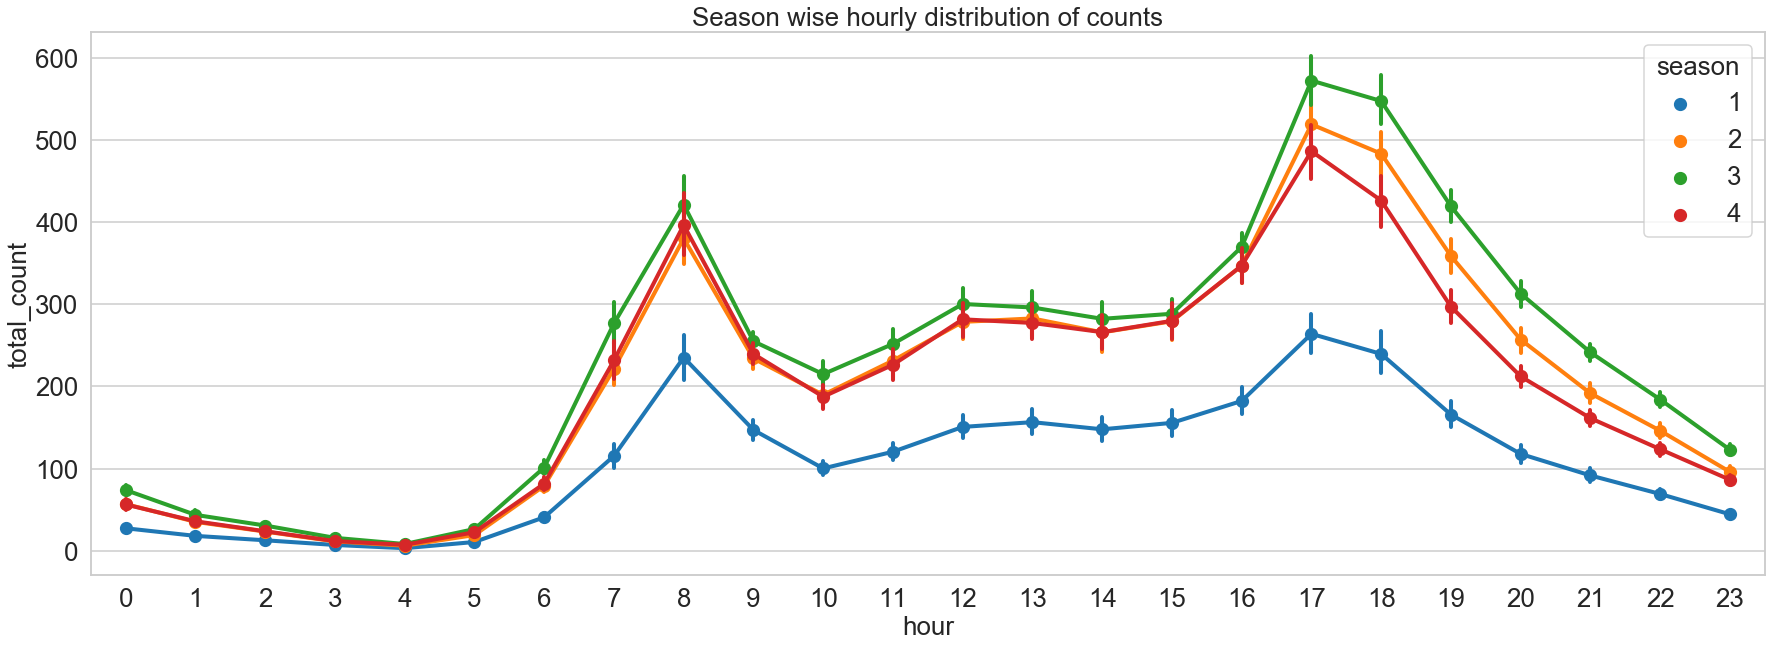

In [21]:
fig,ax = plt.subplots()
sn.pointplot(data=hour_df[['hour',
                           'total_count',
                           'season']],
             x='hour',y='total_count',
             hue='season',ax=ax)
ax.set(title="Season wise hourly distribution of counts")

+ The above plot shows peaks around 8am and 5pm (office hours)
+ Overall higher usage in the second half of the day

[Text(0.5, 1.0, 'Weekday wise hourly distribution of counts')]

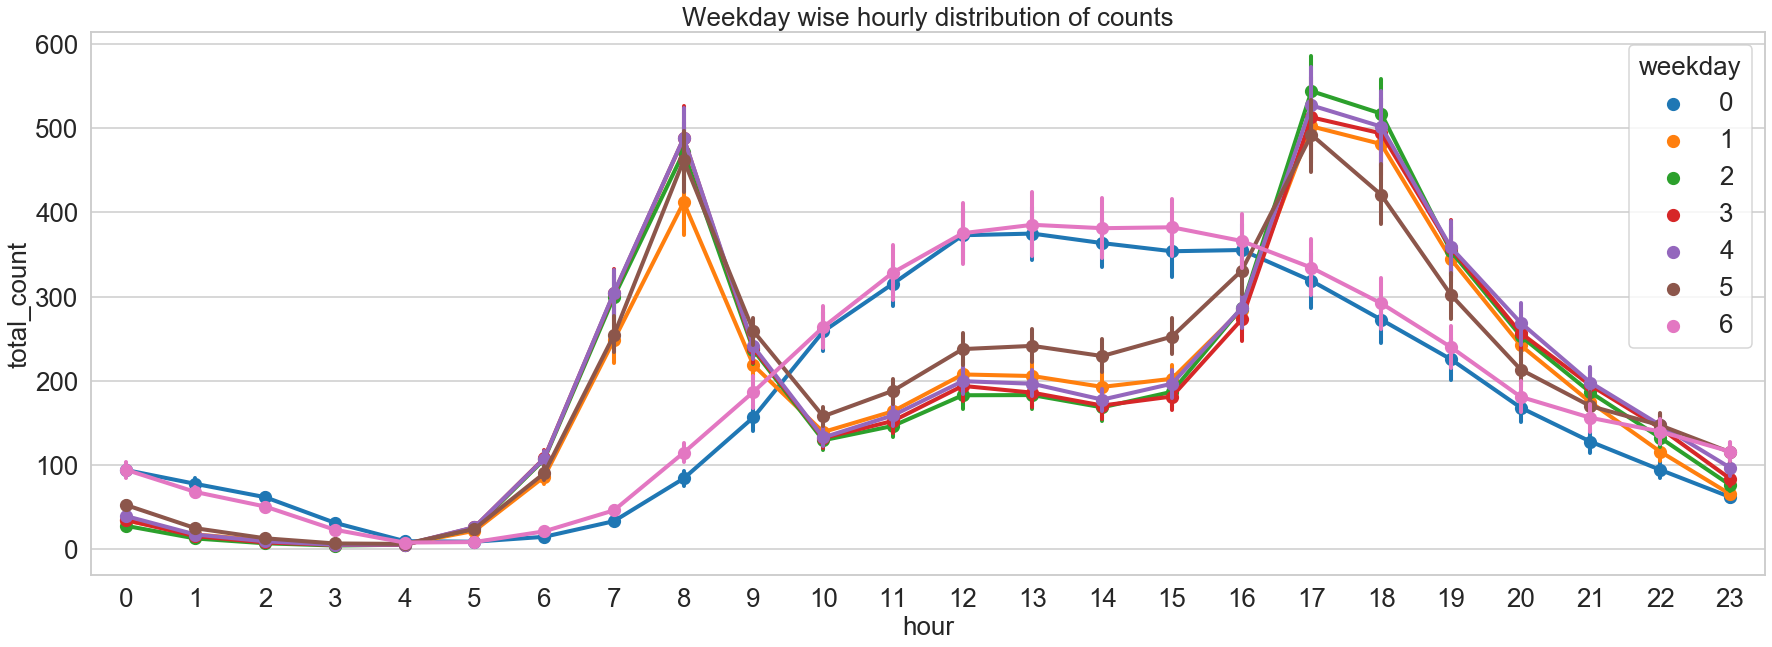

In [22]:
fig,ax = plt.subplots()
sn.pointplot(data=hour_df[['hour','total_count','weekday']],x='hour',y='total_count',hue='weekday',ax=ax)
ax.set(title="Weekday wise hourly distribution of counts")

+ Weekends (0 and 6) and Weekdays (1-5) show different usage trends with weekend's peak usage in during afternoon hours
+ Weekdays follow the overall trend, similar to one visualized in the previous plot
+ Weekdays have higher usage as compared to weekends
+ It would be interesting to see the trends for casual and registered users separately

[Text(0.5, 1.0, 'Box Pot for hourly distribution of counts')]

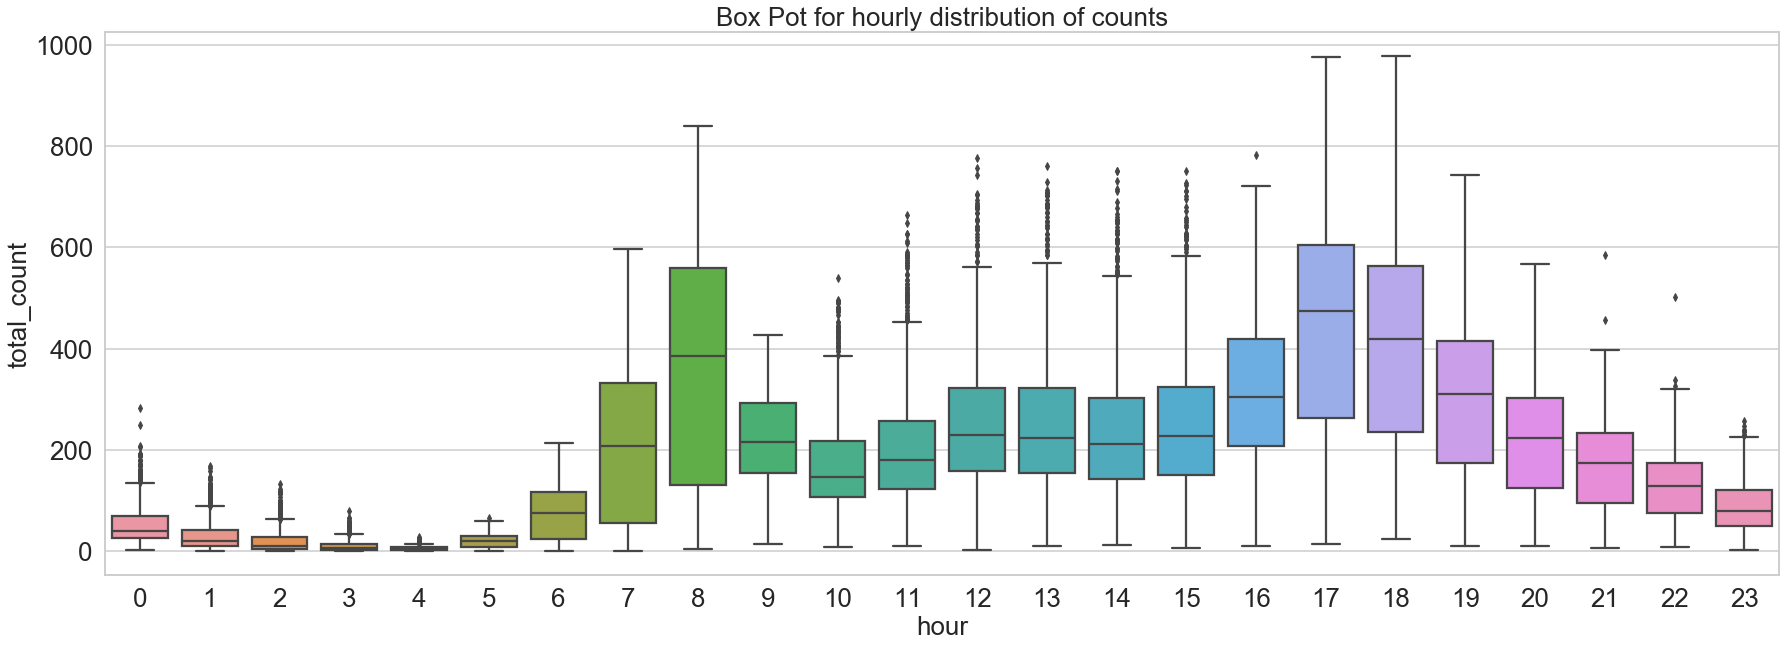

In [23]:
fig,ax = plt.subplots()
sn.boxplot(data=hour_df[['hour','total_count']],x="hour",y="total_count",ax=ax)
ax.set(title="Box Pot for hourly distribution of counts")

+ Early hours (0-4) and late nights (21-23) have low counts but significant outliers
+ Afternoon hours also have outliers
+ Peak hours have higher medians and overall counts with virtually no outliers

### Monthly distribution of Total Counts

[Text(0.5, 1.0, 'Monthly distribution of counts')]

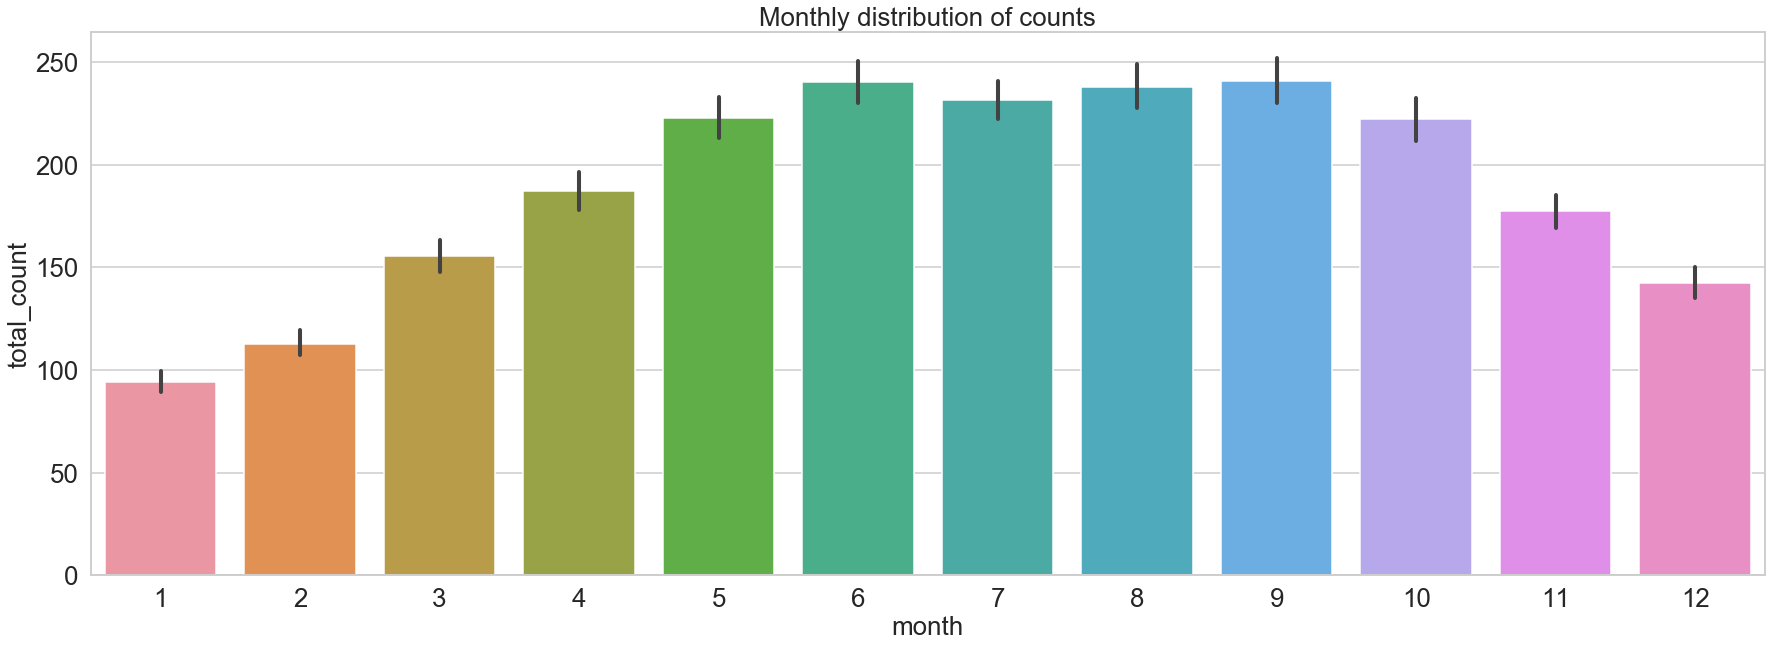

In [24]:
fig,ax = plt.subplots()
sn.barplot(data=hour_df[['month',
                         'total_count']],
           x="month",y="total_count")
ax.set(title="Monthly distribution of counts")

+ Months June-Oct have highest counts. Fall seems to be favorite time of the year to use cycles

[Text(0.5, 1.0, 'Fall')]

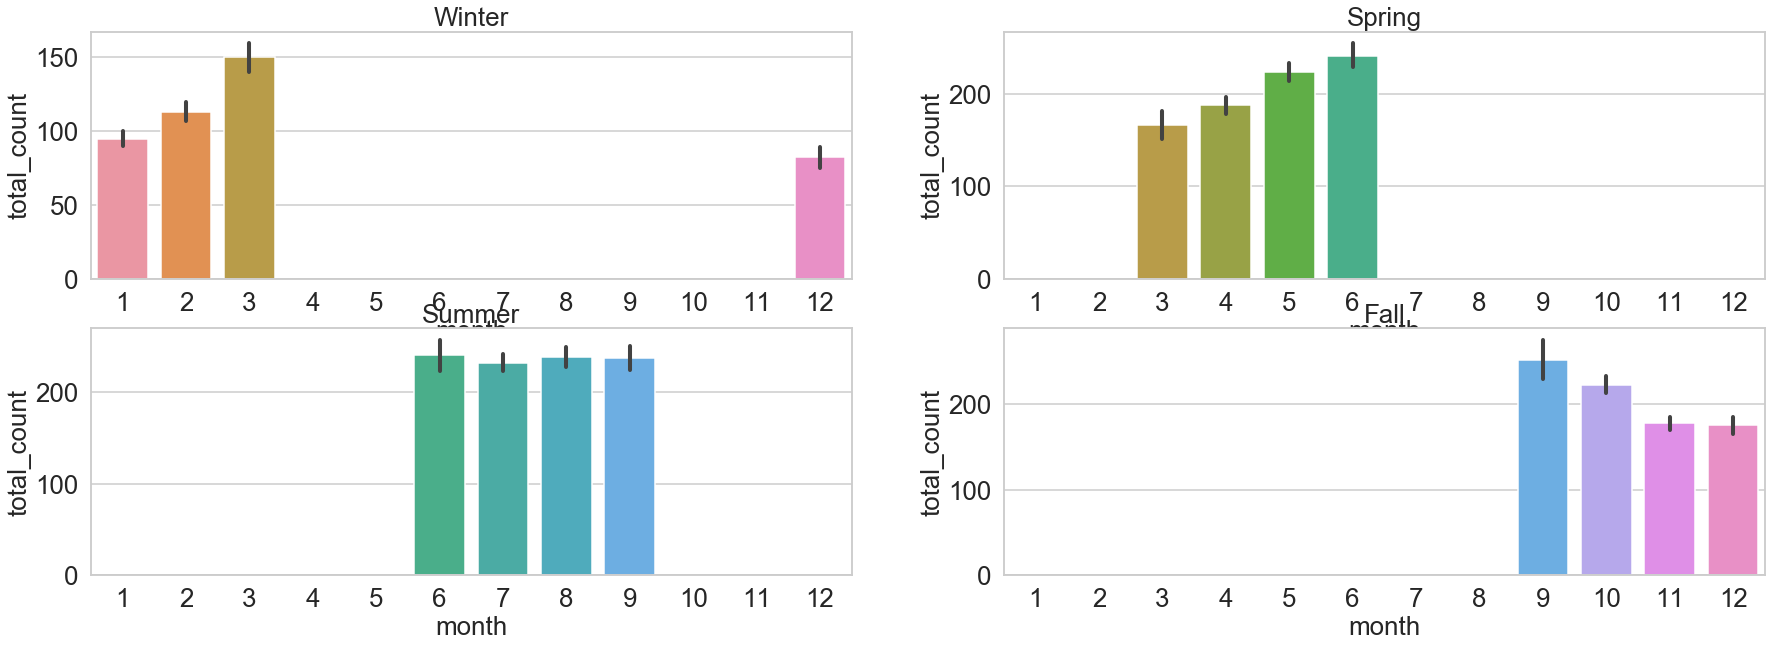

In [25]:
df_col_list = ['month','weekday','total_count']
df_col_list = ['month','total_count']
plot_col_list= ['month','total_count']
winter_df = hour_df[hour_df.season==1][df_col_list]
spring_df = hour_df[hour_df.season==2][df_col_list]
summer_df = hour_df[hour_df.season==3][df_col_list]
fall_df = hour_df[hour_df.season==4][df_col_list]

fig,ax= plt.subplots(nrows=2,ncols=2)
sn.barplot(data=winter_df[plot_col_list],x="month",y="total_count",ax=ax[0][0],)
ax[0][0].set(title="Winter")

sn.barplot(data=spring_df[plot_col_list],x="month",y="total_count",ax=ax[0][1])
ax[0][1].set(title="Spring")

sn.barplot(data=summer_df[plot_col_list],x="month",y="total_count",ax=ax[1][0])
ax[1][0].set(title="Summer")

sn.barplot(data=fall_df[plot_col_list],x="month",y="total_count",ax=ax[1][1])  
ax[1][1].set(title="Fall")

### Year Wise Count Distributions

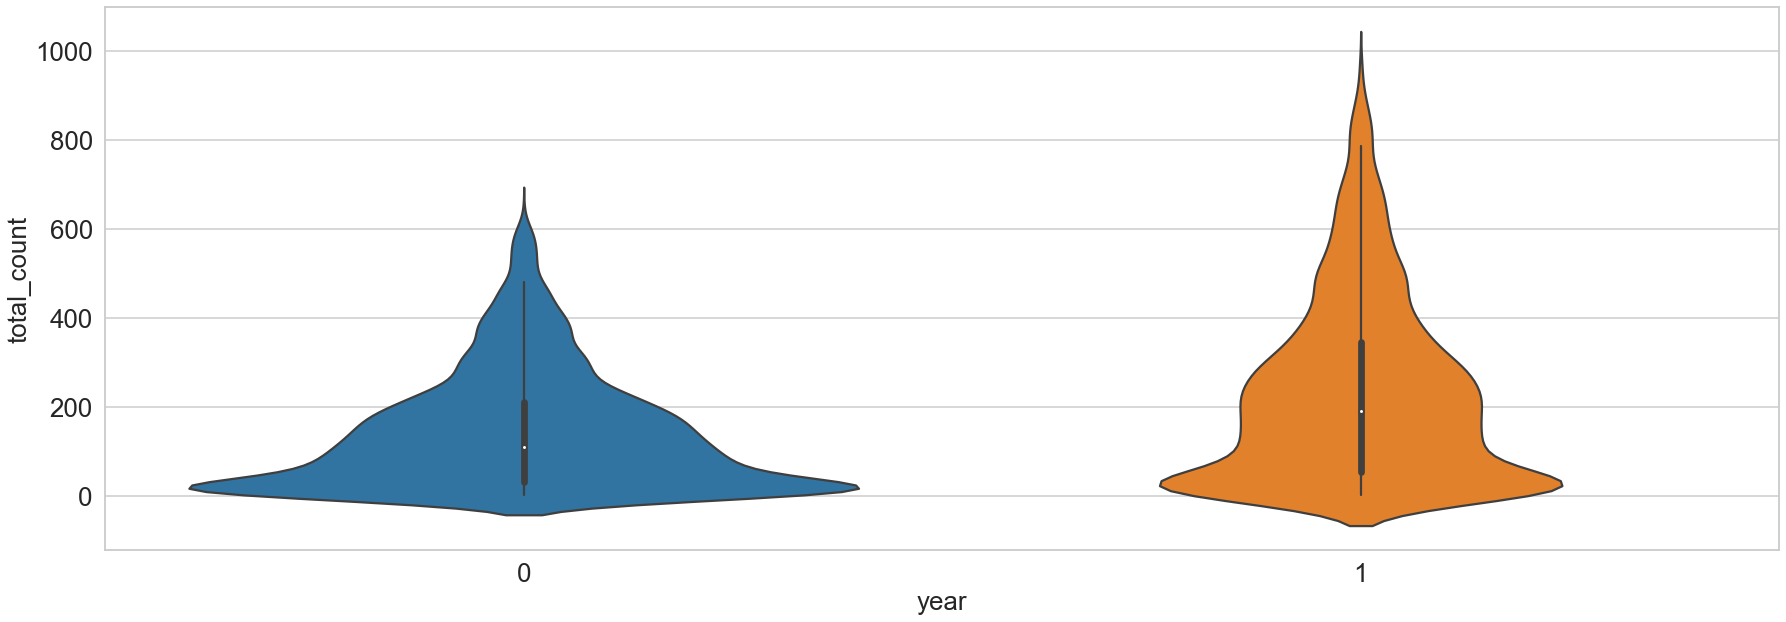

In [26]:
sn.violinplot(data=hour_df[['year',
                            'total_count']],
              x="year",y="total_count")

+ Both years have multimodal distributions
+ 2011 has lower counts overall with a lower median
+ 2012 has a higher max count though the peaks are around 100 and 300 which is then tapering off

### Working Day Vs Holiday Distribution

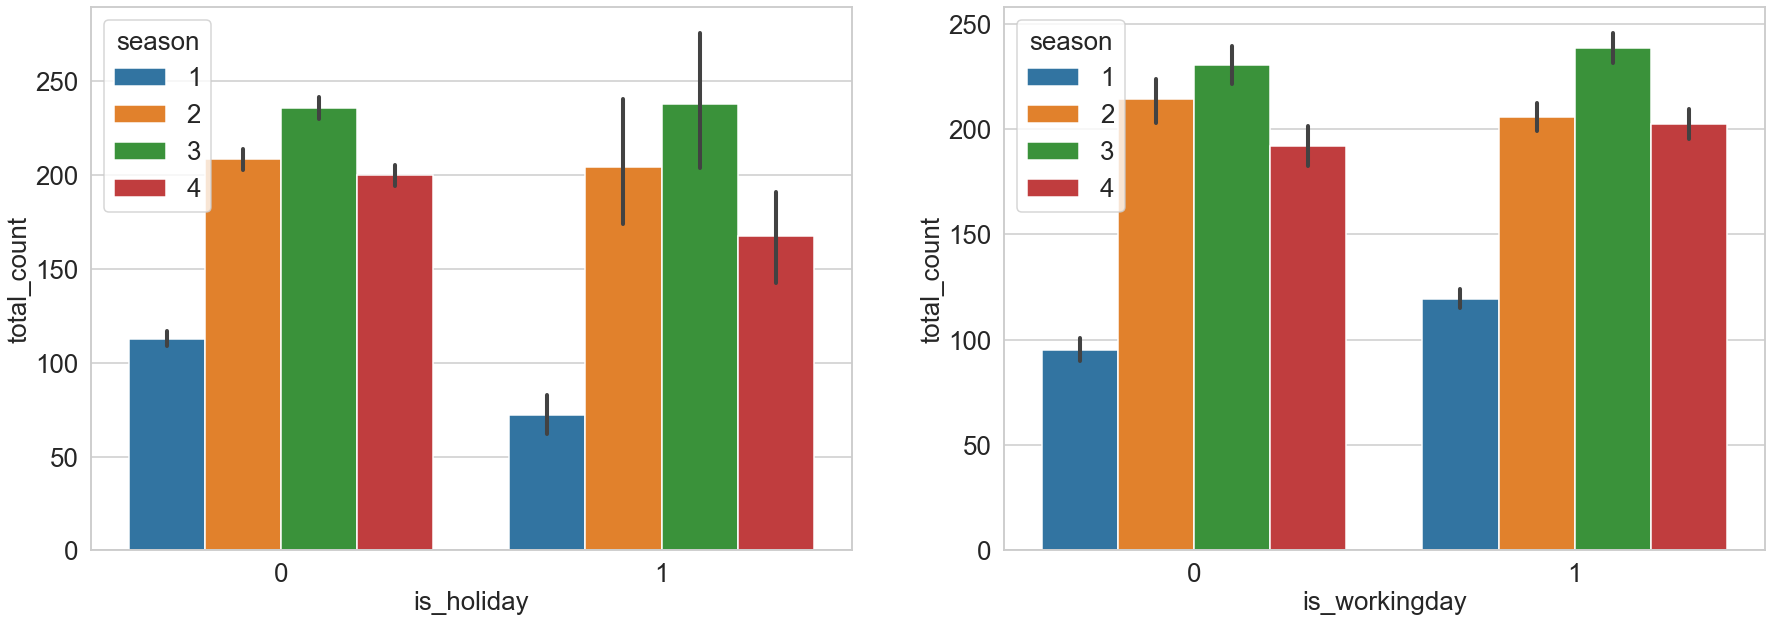

In [27]:
fig,(ax1,ax2) = plt.subplots(ncols=2)
sn.barplot(data=hour_df,x='is_holiday',y='total_count',hue='season',ax=ax1)
sn.barplot(data=hour_df,x='is_workingday',y='total_count',hue='season',ax=ax2)

### Outliers

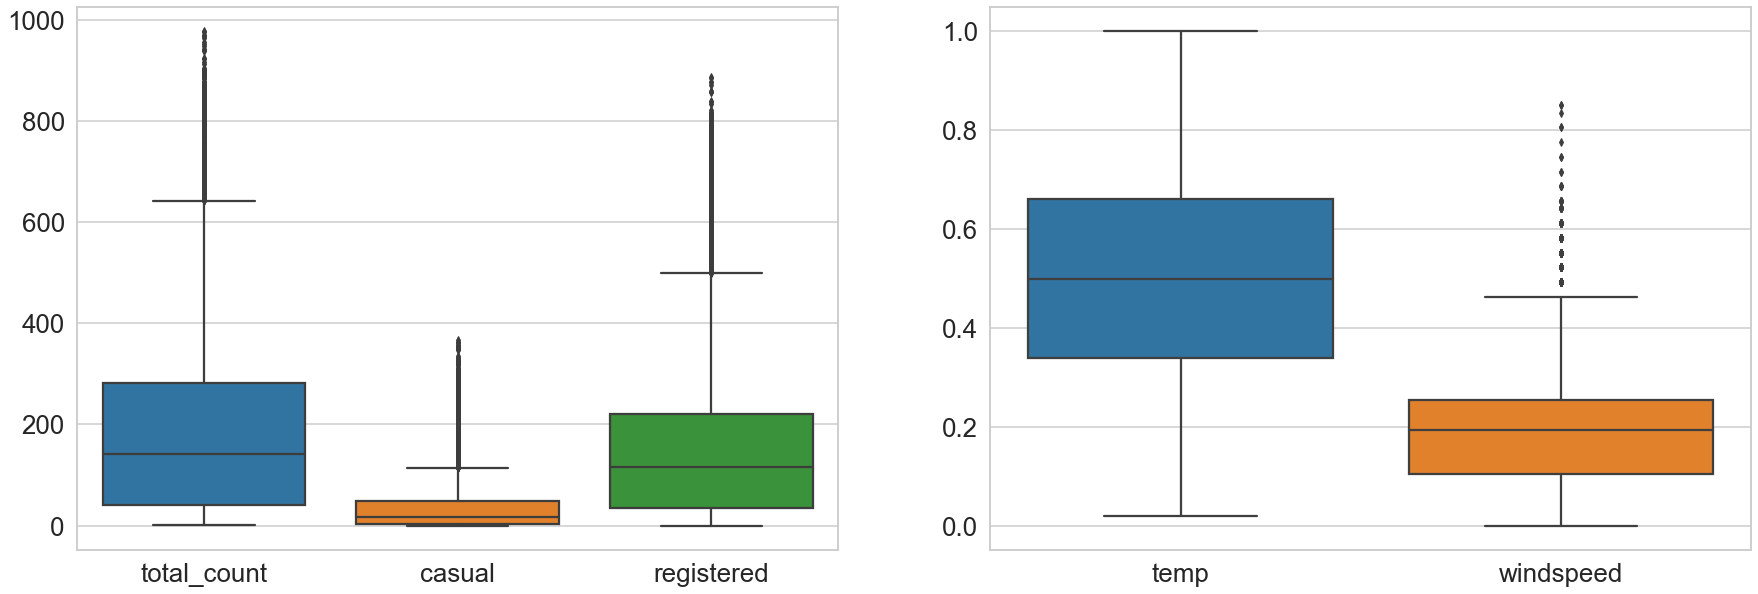

In [28]:
fig,(ax1,ax2)= plt.subplots(ncols=2)
sn.boxplot(data=hour_df[['total_count',
                         'casual','registered']],ax=ax1)
sn.boxplot(data=hour_df[['temp','windspeed']],ax=ax2)

### Correlations

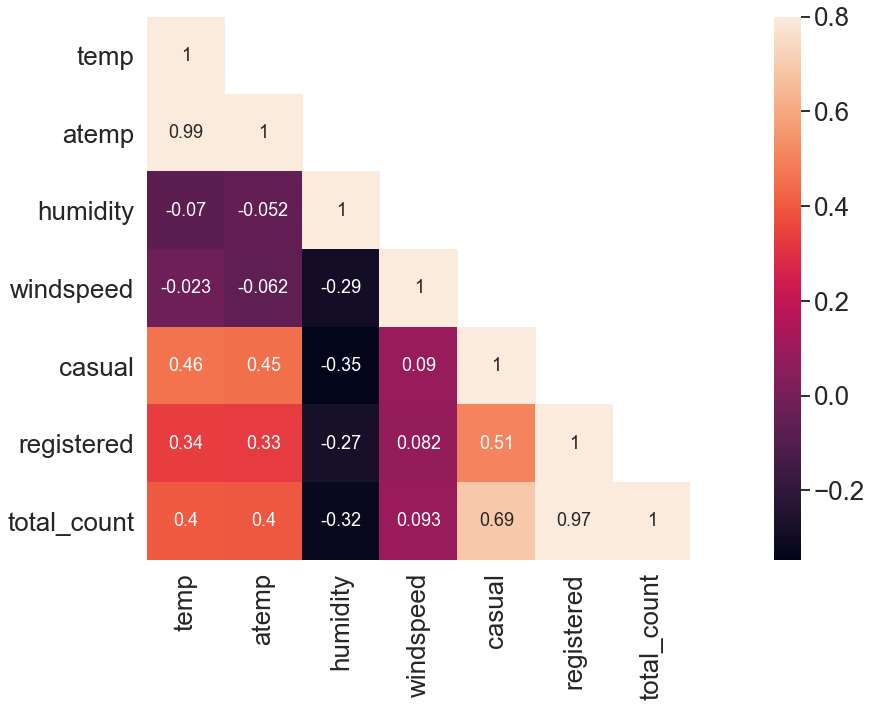

In [29]:
corrMatt = hour_df[["temp","atemp",
                    "humidity","windspeed",
                    "casual","registered",
                    "total_count"]].corr()
mask = np.array(corrMatt)
mask[np.tril_indices_from(mask)] = False
sn.heatmap(corrMatt, mask=mask,
           vmax=.8, square=True,annot=True)

+ Correlation between temp and atemp is very high (as expected)
+ Same is te case with registered-total_count and casual-total_count
+ Windspeed to humidity has negative correlation
+ Overall correlational statistics are not very high.